In [22]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

def running_mean(x, window_size):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[window_size:] - cumsum[:-window_size]) / float(window_size)

def running_std(x, window_size):
    std = []
    for i in range(len(x) - window_size + 1):
        std.append(np.std(x[i:i+window_size]))
    return np.array(std)

def plot_results(env_name, algorithm, experiment_number, window_size=10):
    # Load data
    with open(f'../{algorithm}/checkpoints/{env_name}/{experiment_number}_rewards.pkl', 'rb') as f:
        rewards = pickle.load(f)
    
    with open(f'../{algorithm}/checkpoints/{env_name}/{experiment_number}_losses.pkl', 'rb') as f:
        losses = pickle.load(f)

    rewards = np.array(rewards)
    critic_loss = np.array(losses['critic'])
    actor_loss = np.array(losses['actor'])
    size = 0
    temperature_loss = None
    if losses.get('temperature') is not None:
        temperature_loss = np.array(losses['temperature'])
        size = 4
    else:
        size = 3
    
    # Calculate smoothed data
    rewards_rm = running_mean(rewards, window_size)
    rewards_std = running_std(rewards, window_size)
    
    # Plotting
    fig, ax = plt.subplots(1, size, figsize=(5*size, 7))

    # Plot rewards
    # ax[0].plot(rewards, color='blue', alpha=0.3)
    ax[0].plot(rewards_rm, color='blue', label='Average Return')
    ax[0].fill_between(range(len(rewards_rm)), rewards_rm - rewards_std, rewards_rm + rewards_std, color='blue', alpha=0.3)
    ax[0].set_title('Rewards')
    ax[0].set_xlabel('Episodes')
    ax[0].set_ylabel('Reward')
    ax[0].legend(loc='lower left')
    
    # Plot critic loss
    ax[1].plot(critic_loss, color='red')
    ax[1].set_title('Critic Loss')
    ax[1].set_xlabel('Steps')
    ax[1].set_ylabel('Loss')

    # Plot actor loss
    ax[2].plot(actor_loss, color='red')
    ax[2].set_title('Actor Loss')
    ax[2].set_xlabel('Steps')
    ax[2].set_ylabel('Loss')
    
    if size == 4: 
        # Plot temperature loss
        ax[3].plot(temperature_loss, color='red')
        ax[3].set_title('Temperature Loss')
        ax[3].set_xlabel('Steps')
        ax[3].set_ylabel('Loss')


    plt.tight_layout()
    plt.show()

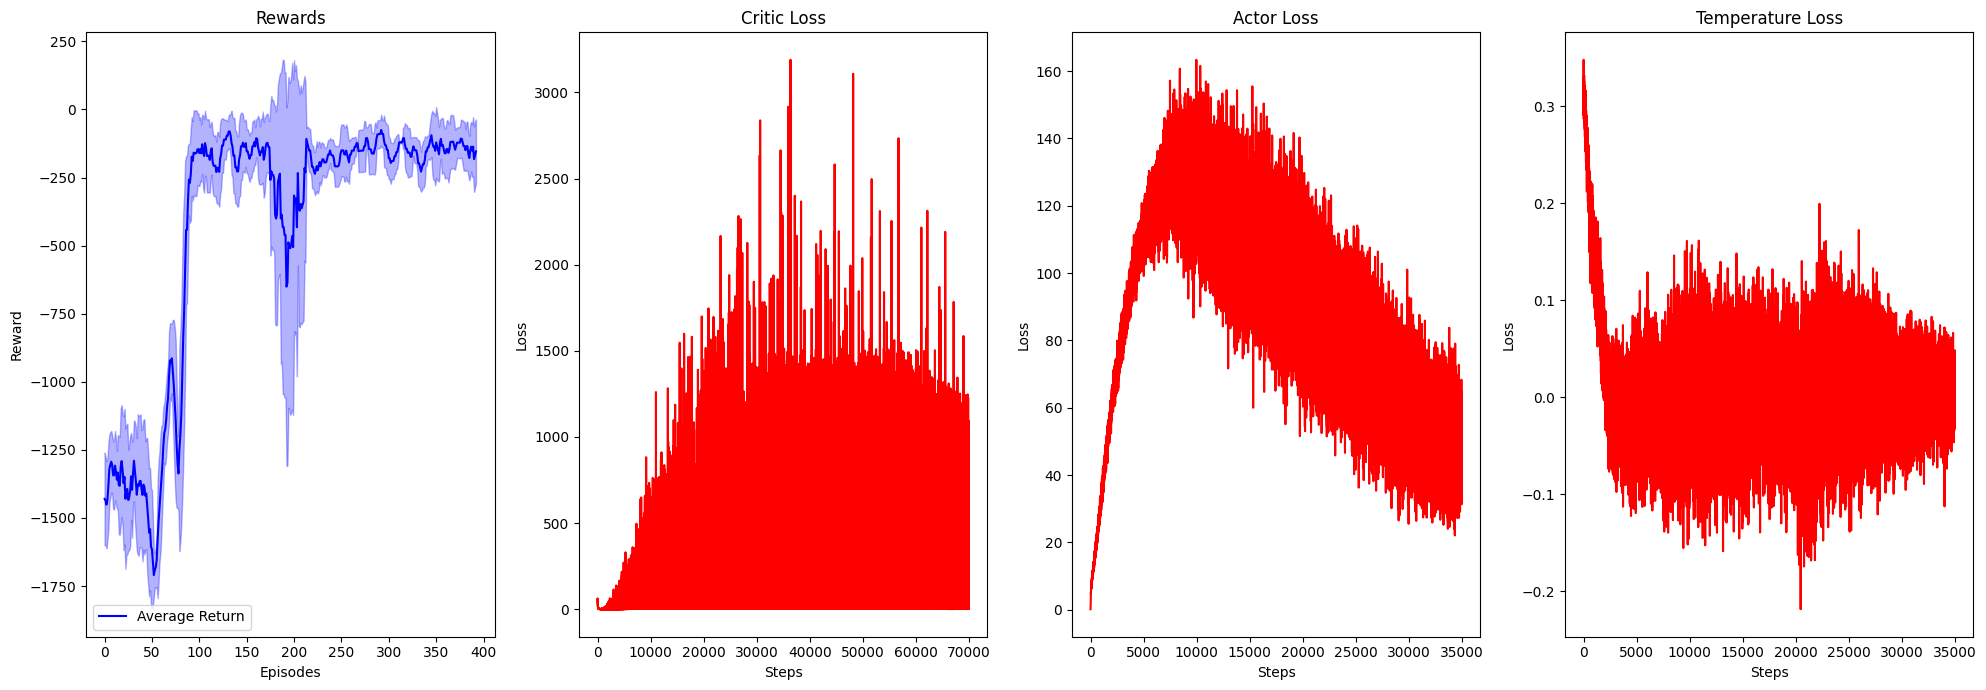

In [23]:
plot_results(env_name='Pendulum-v1', algorithm='SAC', experiment_number='01', window_size=8)
